In [2]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

<a id = "badge5_code"></a>

<div class="alert alert-block alert-success">
    
<b> Coding Question: Complete the code to run a Quantum Support Vector Classification (QSVC) model on dummy data.</b> 
</div>

In [4]:
import numpy as np
from qiskit_machine_learning.algorithms import QSVC
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler
from qiskit.algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel,TrainableFidelityQuantumKernel


# Define the dataset
x_full = np.array([[1.25663706, 5.02654825, 3.76991118],
       [3.76991118, 0.        , 0.62831853],
       [4.08407045, 3.76991118, 1.88495559],
       [0.62831853, 2.82743339, 2.51327412],
       [0.9424778 , 5.96902604, 5.02654825],
       [5.02654825, 2.51327412, 0.31415927],
       [5.34070751, 0.62831853, 3.45575192],
       [0.31415927, 3.45575192, 3.76991118],
       [1.25663706, 4.39822972, 5.96902604],
       [3.76991118, 1.25663706, 2.82743339],
       [3.14159265, 5.34070751, 1.88495559],
       [3.45575192, 0.31415927, 1.57079633],
       [1.57079633, 0.        , 5.96902604],
       [4.08407045, 3.14159265, 0.        ],
       [1.57079633, 4.39822972, 0.9424778 ],
       [0.        , 1.57079633, 0.31415927],
       [5.02654825, 2.82743339, 4.71238898],
       [2.51327412, 0.62831853, 0.62831853],
       [3.14159265, 5.34070751, 1.88495559],
       [5.65486678, 4.71238898, 4.08407045],
       [0.        , 2.19911486, 3.45575192],
       [0.62831853, 0.31415927, 3.45575192],
       [5.65486678, 2.51327412, 5.65486678],
       [2.19911486, 0.62831853, 5.02654825],
       [5.34070751, 3.45575192, 4.39822972],
       [4.08407045, 2.51327412, 4.08407045],
       [0.62831853, 5.65486678, 4.08407045],
       [5.96902604, 4.39822972, 0.62831853],
       [5.96902604, 4.39822972, 5.96902604],
       [0.        , 5.96902604, 4.08407045]])

y_full = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0])

# Split the dataset into a training set and a test set
# 80% for training, 20% for testing
train_size = int(0.8 * len(x_full))
x_train = x_full[:train_size]
y_train = y_full[:train_size]
x_test = x_full[train_size:]
y_test = y_full[train_size:]



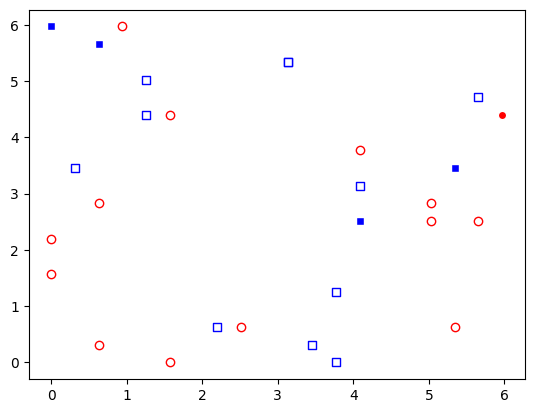

In [10]:
import matplotlib.pyplot as plt
import numpy as np


def plot_features(ax, features, labels, class_label, marker, face, edge, label):
    # A train plot
    ax.scatter(
        # x coordinate of labels where class is class_label
        features[np.where(labels[:] == class_label), 0],
        # y coordinate of labels where class is class_label
        features[np.where(labels[:] == class_label), 1],
        marker=marker,
        facecolors=face,
        edgecolors=edge,
        label=label, 
    )
    
plot_features(plt, x_train, y_train, 0, "s", "w", "b", "A train")
plot_features(plt, x_train, y_train, 1, "o", "w", "r", "B train")
plot_features(plt, x_test, y_test, 0, "s", "b", "w", "A test")
plot_features(plt, x_test, y_test, 1, "o", "r", "w", "B test")



In [12]:

xfeature_map = ZZFeatureMap(feature_dimension=3, reps=2, entanglement="full")

sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

adhoc_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=xfeature_map)

qsvc = QSVC(quantum_kernel=adhoc_kernel)

qsvc.fit(x_train, y_train)



# Evaluate the performance of the model
# You need to achieve a score of >= 0.8 to pass
qsvc_score = qsvc.score(x_test, y_test)
print(f"QSVC classification test score: {qsvc_score}")

QSVC classification test score: 0.8333333333333334


In [13]:
# Run this cell to submit your answer
from qc_grader.challenges.quantum_explorers23 import grade_badge5_code
 
answer_code = grade_badge5_code(qsvc) # Expected result type: QSVC 

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


#### [Ungraded] Run QSVC on a real device!

Run the cells below to run QSVC on a real device.

In [14]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel="ibm_quantum")

# Get the least busy backend, this step may take a while
real_backend = service.least_busy(min_num_qubits=3, simulator=False)

print(f"The least busy backend is {real_backend.name}.")

The least busy backend is ibm_lagos.


In [ ]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.algorithms import QSVC
from qiskit_ibm_runtime import Session
from qiskit.algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_ibm_runtime import Sampler

fm = feature_map = ZZFeatureMap(3)

with Session(service=service, backend=real_backend) as session:
    sampler = Sampler()
    fidelity = ComputeUncompute(sampler)
    quantum_kernel = FidelityQuantumKernel(feature_map=fm, fidelity=fidelity)
    qsvc = QSVC(quantum_kernel=quantum_kernel)
    
###### Add your answers from above here before running the cell #######

qsvc.fit(x_train, y_train)

# Evaluate the performance of the model
qsvc_score = qsvc.score(x_test, y_test)
print(f"QSVC classification test score: {qsvc_score}")